                                                 Stock Market Prediction Machine Learning Model

---



---









In [ ]:
#Installing 'quandl'
!pip install quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Impoting necessary packages and libraries
import quandl, math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
#Defining the API key for Qyandl
auth_tok="y7up7Ma76YDycziKzoTA"
#Taking the data from Quandle into variable 'data'
# data = quandl.get("EOD/AAPL", trim_start = "2000-12-12", trim_end = "2020-12-30", authtoken=auth_tok)
# data=quandl.get("BSE/BOM500180",trim_start = "2000-12-12", trim_end = "2022-12-30", authtoken=auth_tok )
data = quandl.get('WIKI/TSLA', start_date = "2010-06-29", end_date = "2018-03-27")

#Printing the dataset
print(data)

              Open      High     Low   Close      Volume  Ex-Dividend  \
Date                                                                    
2010-06-29   19.00   25.0000   17.54   23.89  18766300.0          0.0   
2010-06-30   25.79   30.4192   23.30   23.83  17187100.0          0.0   
2010-07-01   25.00   25.9200   20.27   21.96   8218800.0          0.0   
2010-07-02   23.00   23.1000   18.71   19.20   5139800.0          0.0   
2010-07-06   20.00   20.0000   15.83   16.11   6866900.0          0.0   
...            ...       ...     ...     ...         ...          ...   
2018-03-21  310.25  322.4400  310.19  316.53   5927881.0          0.0   
2018-03-22  313.89  318.8200  308.18  309.10   4914307.0          0.0   
2018-03-23  311.25  311.6100  300.45  301.54   6600538.0          0.0   
2018-03-26  307.34  307.5900  291.36  304.18   8324639.0          0.0   
2018-03-27  304.00  304.2700  277.18  279.18  13696168.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj

In [ ]:
data


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,310.25,322.4400,310.19,316.53,5927881.0,0.0,1.0,310.25,322.4400,310.19,316.53,5927881.0
2018-03-22,313.89,318.8200,308.18,309.10,4914307.0,0.0,1.0,313.89,318.8200,308.18,309.10,4914307.0
2018-03-23,311.25,311.6100,300.45,301.54,6600538.0,0.0,1.0,311.25,311.6100,300.45,301.54,6600538.0


In [ ]:
#Taking only necessary columns in dataset (for creating new columns)
data = data[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
#Creating new columns, and adding data for them using specific formula
data['HL_PCT'] = (data['Adj. High'] - data['Adj. Low']) / data['Adj. Close'] * 100.0
data['PCT_change'] = (data['Adj. Close'] - data['Adj. Open']) / data['Adj. Open'] * 100.0
#Taking only ncessary columns in final working dataset
data = data[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
#Printing the updated dataset
print(data)

            Adj. Close     HL_PCT  PCT_change  Adj. Volume
Date                                                      
2010-06-29       23.89  31.226455   25.736842   18766300.0
2010-06-30       23.83  29.874948   -7.599845   17187100.0
2010-07-01       21.96  25.728597  -12.160000    8218800.0
2010-07-02       19.20  22.864583  -16.521739    5139800.0
2010-07-06       16.11  25.884544  -19.450000    6866900.0
...                ...        ...         ...          ...
2018-03-21      316.53   3.870091    2.024174    5927881.0
2018-03-22      309.10   3.442252   -1.526012    4914307.0
2018-03-23      301.54   3.701002   -3.119679    6600538.0
2018-03-26      304.18   5.335657   -1.028177    8324639.0
2018-03-27      279.18   9.703417   -8.164474   13696168.0

[1949 rows x 4 columns]


<ipython-input-13-c626f4a3b686>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['HL_PCT'] = (data['Adj. High'] - data['Adj. Low']) / data['Adj. Close'] * 100.0
<ipython-input-13-c626f4a3b686>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PCT_change'] = (data['Adj. Close'] - data['Adj. Open']) / data['Adj. Open'] * 100.0


AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


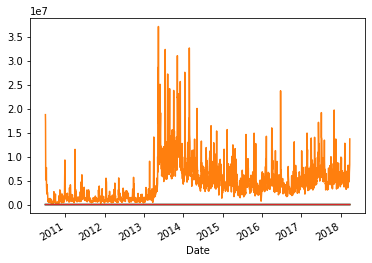

In [ ]:
print(data["Adj. Close"].plot())
print(data["Adj. Volume"].plot())
print(data["PCT_change"].plot())
print(data["HL_PCT"].plot())


Visualizing correlation between features using heatmap -->



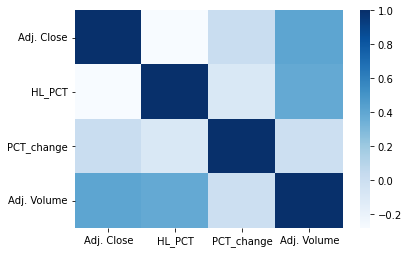

In [ ]:
#Checking correlation among features
print("Visualizing correlation between features using heatmap -->\n")
sns.heatmap(data.corr(method='pearson'), cmap='Blues')

In [ ]:
#Defining forecasting column
forecast_col = 'Adj. Close'
#Replacing NaN values with '-99999' value which is considered as an outlier by most ML classifiers
data.fillna(value=-99999, inplace=True)
#Forecasting out 1% of the dataset's length
forecast_out = int(math.ceil(0.01 * len(data)))
#Adding a new coumn for 'label'
data['label'] = data[forecast_col].shift(-forecast_out)


In [ ]:
print(data)

            Adj. Close     HL_PCT  PCT_change  Adj. Volume  label
Date                                                             
2010-06-29       23.89  31.226455   25.736842   18766300.0  20.72
2010-06-30       23.83  29.874948   -7.599845   17187100.0  20.35
2010-07-01       21.96  25.728597  -12.160000    8218800.0  19.94
2010-07-02       19.20  22.864583  -16.521739    5139800.0  20.92
2010-07-06       16.11  25.884544  -19.450000    6866900.0  21.95
...                ...        ...         ...          ...    ...
2018-03-21      316.53   3.870091    2.024174    5927881.0    NaN
2018-03-22      309.10   3.442252   -1.526012    4914307.0    NaN
2018-03-23      301.54   3.701002   -3.119679    6600538.0    NaN
2018-03-26      304.18   5.335657   -1.028177    8324639.0    NaN
2018-03-27      279.18   9.703417   -8.164474   13696168.0    NaN

[1949 rows x 5 columns]


In [ ]:
#Preparing X and y
X = np.array(data.drop(['label'], 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
data.dropna(inplace=True) #Dropping NaN values
y = np.array(data['label'])
#Splitting the data into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Training the linear regression model
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

<ipython-input-19-621c9b031b8e>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(data.drop(['label'], 1))


LinearRegression(n_jobs=-1)

In [ ]:
#Predicting y values
y_predicted = clf.predict(X_test)
#Printing predicted values
print(y_predicted)


[228.28016483  37.41813985  24.8402882   31.28981223  29.7434695
 295.83500371 240.82777732 172.65895471 262.97259208  33.28463979
 155.28053373 230.85719727 307.8330409   35.25947433 323.27447269
 178.2670219  314.85352197 165.06452695 257.59405514 223.0653391
  36.21762417 260.37673459  47.27720992 231.39580674 349.5406611
 338.89258036  30.54366973 191.96949546  20.31610961  35.48807404
  32.63486583  31.50047266  37.10305947  33.19855351  31.80765038
 226.12458573 192.57274022 195.01702046 241.01200503  40.20985796
  41.13890305 105.92860641 241.027687    37.39191444  20.71535238
 354.04738219  11.88503283 198.94388345  38.28220025 277.73415114
 253.3455577   39.84887885 253.06100083 305.25821721 220.75359354
 222.95712074  32.9613066   27.86573259 348.64467179 202.32864755
 207.77932287 220.83540794  28.48374509 207.68049955  32.54597463
 264.84584947  29.02942496 230.3215046  322.01329145 237.54846559
 262.76479402 181.55688282 183.95150479 357.18591945  34.13928669
 198.46018284

Actual values -->
[222, 34, 34, 32, 27, 323, 247, 248, 246, 27, 139, 219, 311, 27, 359, 121, 349, 205, 248, 234]

Predicted values -->
[228, 37, 24, 31, 29, 295, 240, 172, 262, 33, 155, 230, 307, 35, 323, 178, 314, 165, 257, 223]





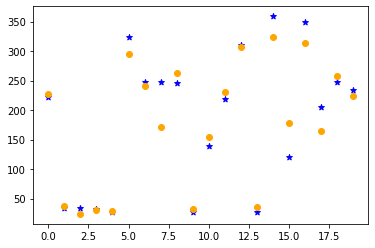

In [ ]:
temp1 = []
temp2 = []
temp3 = []
for i in range(20):
  temp1.append(int(y_test[i]))
for i in range(20):
  temp2.append(int(y_predicted[i]))
for i in range(20):
  temp3.append(i)
#Printing original values
print("Actual values -->")
print(temp1)
#Printing predicted values
print("\nPredicted values -->")
print(temp2)
print("\n"*2)
plt.scatter(temp3, temp1, marker="*", color = 'blue')
plt.scatter(temp3, temp2, color = 'orange')


In [ ]:
#Finding MSE value
MSE = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error: %.5f" %MSE)
# Finding confidence value
confidence = clf.score(X_test, y_predicted)
print("Confidence:         %.5f" %confidence)

Mean Squared Error: 434.68616
Confidence:         1.00000


In [ ]:
#Making prediction on custom value
custom_pred = clf.predict([[-2.93777787e-01, -9.02387310e-01, -1.05003377e-01, -3.19550752e-01]])
print("The prediction for custom values : %.5f" % custom_pred)



The prediction for custom values : 130.58091
